<a href="https://colab.research.google.com/github/DSF-Kotaro/classroom/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%83%86%E3%82%A3%E3%82%B9%E3%83%88%E6%BC%94%E7%BF%92%EF%BC%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 警告(worning)の非表示化
import warnings
warnings.filterwarnings('ignore')

# 3 顧客の全体像を把握する

### 1：データを読み込む

In [1]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

58254


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [2]:
customer = pd.read_csv('customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [3]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [4]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


### 2：顧客データの整形

In [5]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [6]:
print(len(customer))
print(len(customer_join))

4192
4192


In [7]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

### 3：顧客データの基礎集計

In [8]:
customer_join.groupby("class_name").count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [9]:
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [10]:
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [11]:
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [12]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"]>pd.to_datetime("20180401")]
print(len(customer_start))

1361


### 4：最新顧客データの基礎集計

In [13]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"]>=pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [14]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [15]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [16]:
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

### 5：利用履歴データの集計

In [18]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["年月","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [19]:
uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min" ])["count"]
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.0,4.5,5,2
1,AS008805,6.0,6.0,8,4
2,AS009013,2.0,2.0,2,2
3,AS009373,3.5,3.5,4,3
4,AS015233,6.0,7.0,7,4


### 6：利用履歴データから定期利用フラグを作成

In [20]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id","年月","weekday"], as_index=False).count()[["customer_id","年月", "weekday","log_id"]]
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5.0,4
1,AS002855,201805,2.0,1
2,AS002855,201805,5.0,4
3,AS002855,201806,5.0,5
4,AS002855,201807,5.0,2


In [21]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id", "count"]]
uselog_weekday["routine_flg"] = 0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,4,1
4,AS015233,3,0


### 7：顧客データと利用履歴データを結合

In [22]:
customer_join = pd.merge(customer_join,
                         uselog_customer,
                         on="customer_id",
                         how="left")

customer_join = pd.merge(customer_join,
                         uselog_weekday[["customer_id", "routine_flg"]],
                         on="customer_id",
                         how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.50,4.0,8.0,2.0,1.0
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.25,6.0,7.0,2.0,1.0
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3.75,4.0,5.0,2.0,1.0
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.75,5.0,7.0,2.0,1.0
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.50,3.5,6.0,1.0,1.0


In [23]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean              718
median            718
max               718
min               718
routine_flg       718
dtype: int64

### ノック28：会員期間を計算しよう

In [25]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0

for i in range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"].iloc[i],
                          customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months

customer_join.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.50,4.0,8.0,2.0,1.0,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.25,6.0,7.0,2.0,1.0,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,3.75,4.0,5.0,2.0,1.0,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.75,5.0,7.0,2.0,1.0,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.50,3.5,6.0,1.0,1.0,2019-04-30,47


### 9：顧客行動の各種統計量の把握

In [26]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,3474.000000,3474.000000,3474.000000,3474.000000
mean,4.677365,4.788428,6.632124,2.513529
std,1.521180,1.750036,2.247298,1.195281
min,1.000000,1.000000,1.000000,1.000000
25%,3.750000,3.500000,5.000000,2.000000
50%,4.750000,4.500000,7.000000,2.000000
75%,5.750000,6.000000,8.000000,3.000000
max,12.000000,12.000000,14.000000,12.000000


In [27]:
customer_join.groupby("routine_flg").count()["customer_id"]

routine_flg
0.0     969
1.0    2505
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

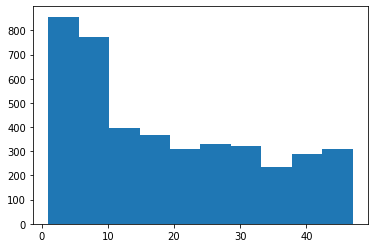

In [28]:
import matplotlib.pyplot as plt
plt.hist(customer_join["membership_period"])

### 10：退会ユーザーと継続ユーザーの違いを把握

In [29]:
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1350.000000
mean,1.0,8595.555556,4.020051,4.052901,5.735495,2.244027,0.302901,8.026667
std,0.0,1949.163652,1.662880,1.848377,2.617683,1.307604,0.459709,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,2.750000,2.500000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,6.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,5.333333,5.500000,8.000000,3.000000,1.000000,11.000000
max,1.0,10500.000000,12.000000,12.000000,12.000000,12.000000,1.000000,23.000000


In [30]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2842.000000
mean,0.0,8542.927516,5.012019,5.162902,7.088619,2.650738,0.933970,23.970443
std,0.0,1977.189779,1.324112,1.570993,1.875518,1.109242,0.248388,13.746761
min,0.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.000000,4.000000,6.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.000000,5.000000,7.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,6.000000,6.000000,8.000000,3.000000,1.000000,35.000000
max,0.0,10500.000000,9.000000,10.000000,14.000000,8.000000,1.000000,47.000000


In [50]:
customer_stay = customer_join[customer_join["is_deleted"]==0]
customer_end = customer_join[customer_join["is_deleted"]==1]

(array([392., 248., 170., 301., 244., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

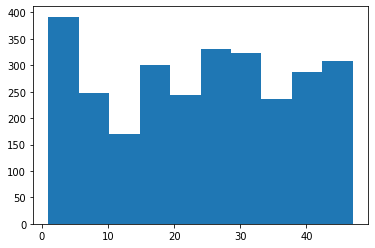

In [72]:
plt.hist(customer_stay['membership_period'])

(array([251., 214., 222., 233., 167., 129.,  24.,  27.,  29.,  54.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <a list of 10 Patch objects>)

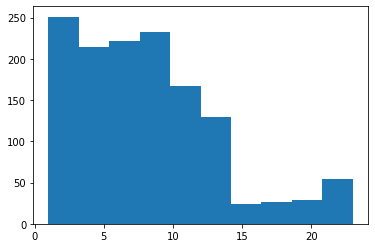

In [73]:
plt.hist(customer_end['membership_period'])